In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('/content/delivery.csv')

In [4]:
df.head()

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,basket_amount_lc,delivery_fee_amount_lc,Payment Method,actual_delivery_time,promised_delivery_time,order_delay,dropoff_distance_manhattan,platform,vertical_class,vertical,is_affordable_freedelivery,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City
0,544145594,9/1/2021 10:41,6zWSp9yqnEQuq4N6ykRgbbdQ,False,True,NaN,NaN,NaN,TGO,134.6900,119.7000,14.99,Cash,1896.0,1739.0,157.0,3294.0,iOS,food,food,False,False,False,False,False,False,NaN,Chennai
1,544478492,9/1/2021 18:17,TtmFFw26sQR26nBE2RykhxQA,False,True,NaN,NaN,NaN,TGO,134.6454,129.6554,4.99,Cash,3506.0,2159.0,1347.0,1911.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
2,544358032,9/1/2021 15:56,7pB4MC2aBPRdajLH2wPvIvAA,False,True,NaN,NaN,NaN,TGO,84.4900,79.5000,4.99,Cash,3357.0,2159.0,1198.0,560.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
3,544366924,9/1/2021 16:09,AFedsf0e-lSZer_X0eR4VE-g,False,True,NaN,NaN,NaN,TGO,320.0130,310.0230,9.99,Cash,3237.0,2519.0,718.0,1380.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
4,544372362,9/1/2021 16:16,JDYqF36aULSEaWsz604DuuRw,False,True,NaN,NaN,NaN,TGO,83.9900,69.0000,14.99,Online - Card,1216.0,1499.0,-283.0,1902.0,android,food,food,False,False,False,False,False,False,NaN,Chennai


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119885 entries, 0 to 119884
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    119885 non-null  int64  
 1   order_time                  119885 non-null  object 
 2   analytical_customer_id      119885 non-null  object 
 3   is_acquisition              119885 non-null  bool   
 4   is_successful               119885 non-null  bool   
 5   reason                      19716 non-null   object 
 6   sub_reason                  8348 non-null    object 
 7   owner                       19716 non-null   object 
 8   delivery_arrangement        119885 non-null  object 
 9   gmv_amount_lc               119885 non-null  float64
 10  basket_amount_lc            119885 non-null  float64
 11  delivery_fee_amount_lc      119885 non-null  float64
 12  Payment Method              119885 non-null  object 
 13  actual_deliver

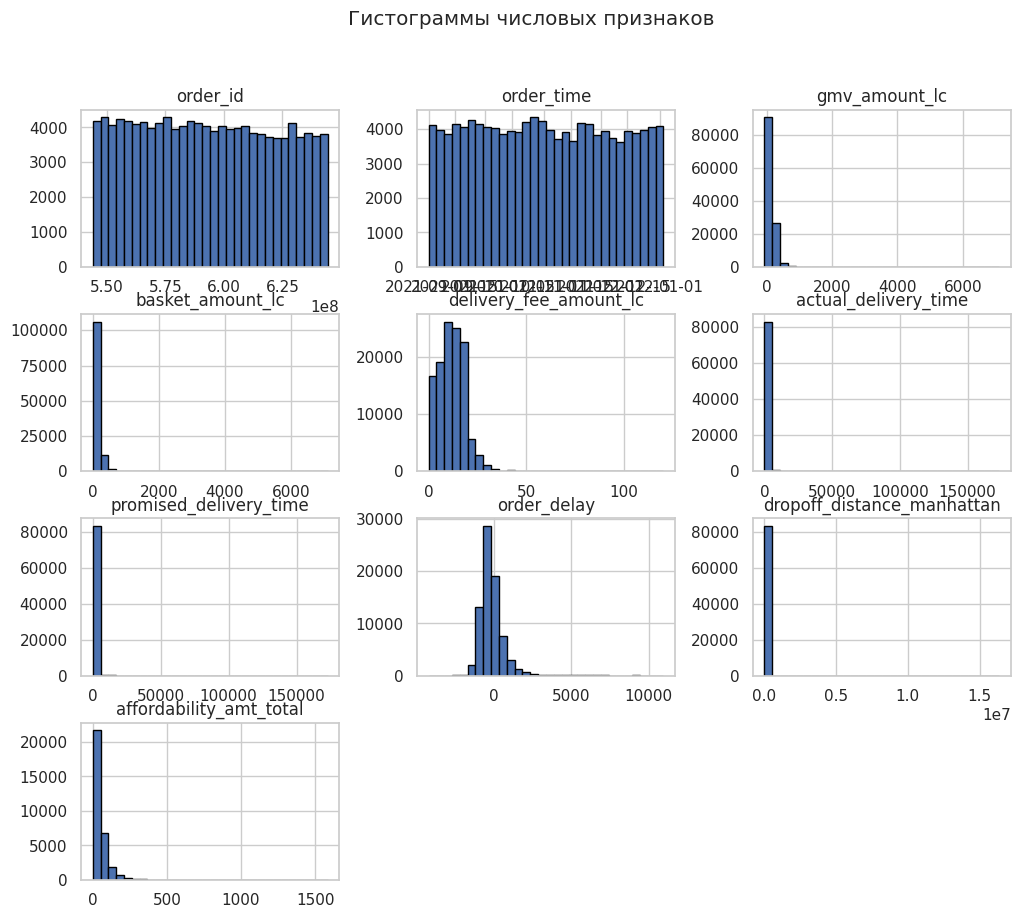

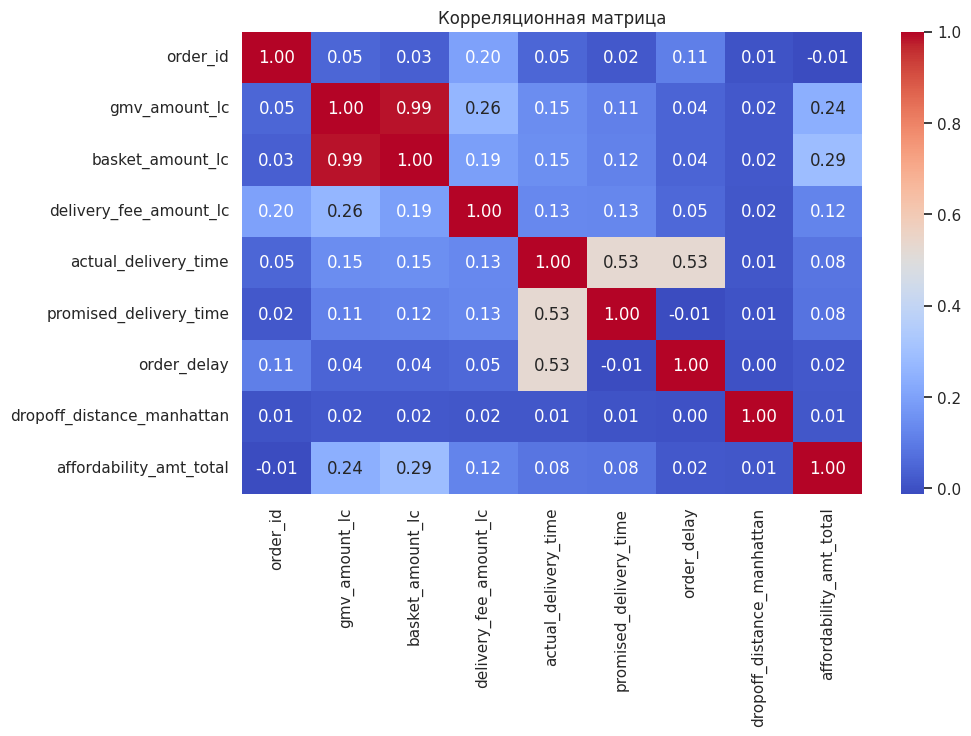

In [28]:
sns.set(style='whitegrid')

df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Гистограммы числовых признаков')
plt.show()

numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

<ipython-input-29-af4890a3977a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




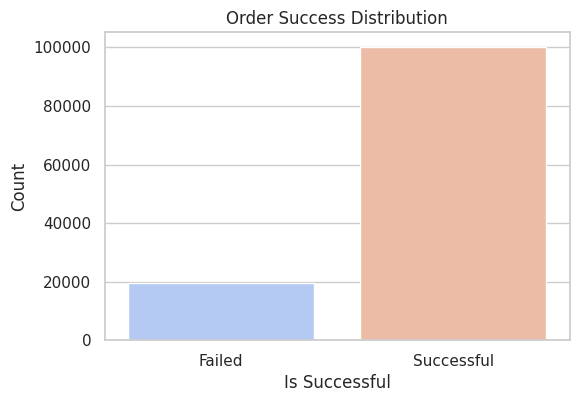

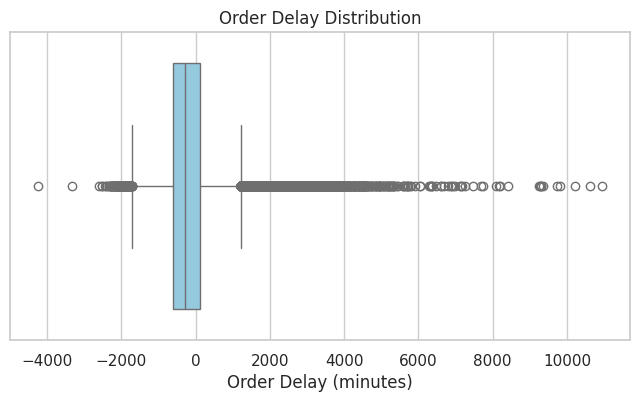

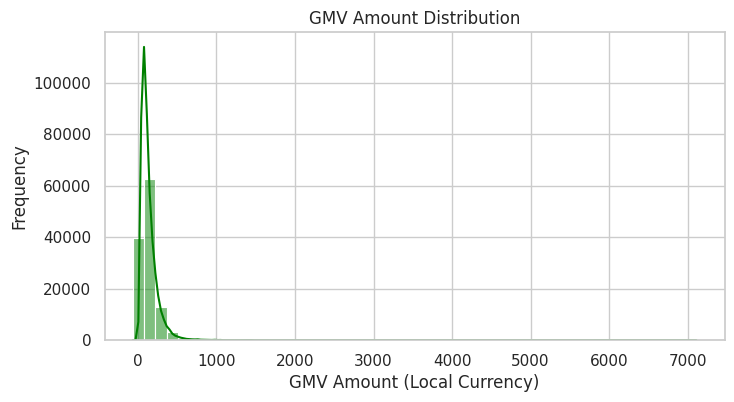

<ipython-input-29-af4890a3977a>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




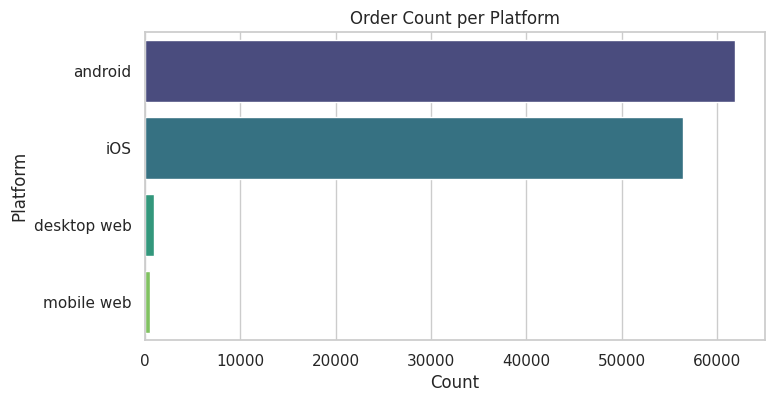

<ipython-input-29-af4890a3977a>:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




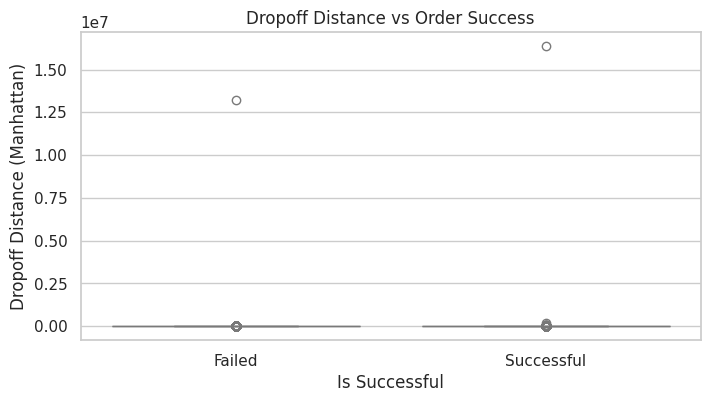

In [29]:
sns.set_style("whitegrid")

# Plot distribution of order success rates
plt.figure(figsize=(6, 4))
sns.countplot(x=df["is_successful"], palette="coolwarm")
plt.title("Order Success Distribution")
plt.xlabel("Is Successful")
plt.ylabel("Count")
plt.xticks([0, 1], ["Failed", "Successful"])
plt.show()

# Boxplot of order delay time
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["order_delay"].dropna(), color="skyblue")
plt.title("Order Delay Distribution")
plt.xlabel("Order Delay (minutes)")
plt.show()

# Distribution of GMV amount
plt.figure(figsize=(8, 4))
sns.histplot(df["gmv_amount_lc"], bins=50, kde=True, color="green")
plt.title("GMV Amount Distribution")
plt.xlabel("GMV Amount (Local Currency)")
plt.ylabel("Frequency")
plt.show()

# Count of orders per platform
plt.figure(figsize=(8, 4))
sns.countplot(y=df["platform"], order=df["platform"].value_counts().index, palette="viridis")
plt.title("Order Count per Platform")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.show()

# Relationship between dropoff distance and order success
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["is_successful"], y=df["dropoff_distance_manhattan"], palette="coolwarm")
plt.title("Dropoff Distance vs Order Success")
plt.xlabel("Is Successful")
plt.ylabel("Dropoff Distance (Manhattan)")
plt.xticks([0, 1], ["Failed", "Successful"])
plt.show()


<ipython-input-30-709df6ddd2bc>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




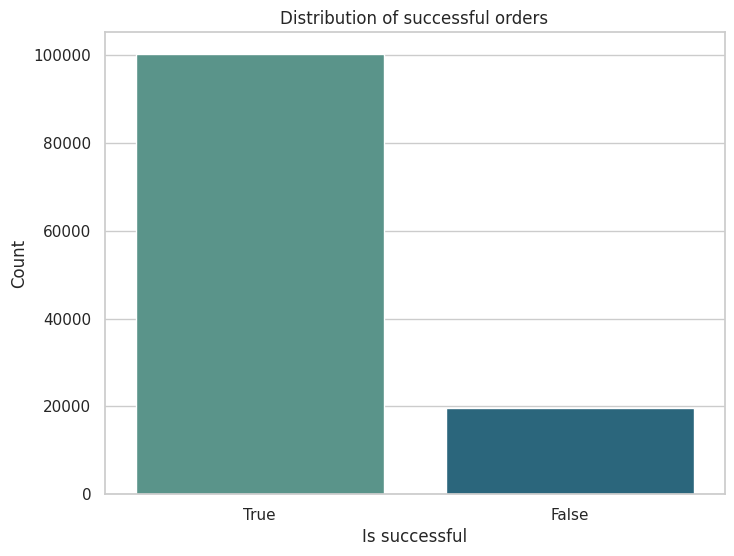

In [30]:
counts = df['is_successful'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Is successful')
plt.ylabel('Count')
plt.title('Distribution of successful orders')
plt.show()

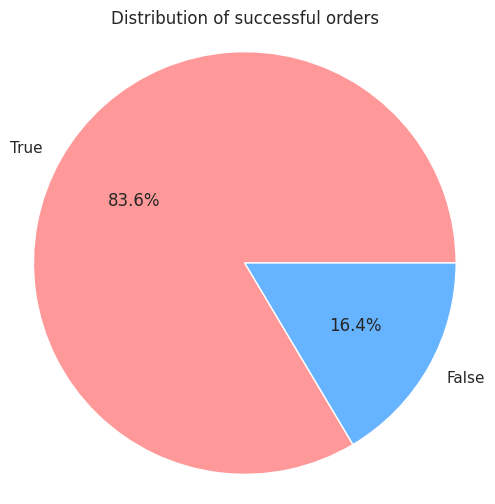

In [31]:
custom_colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(counts.values, labels=counts.index.astype(str), autopct='%1.1f%%', colors=custom_colors)
plt.axis('equal')
plt.title('Distribution of successful orders')
plt.show()

<ipython-input-32-78a9059d4d9b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




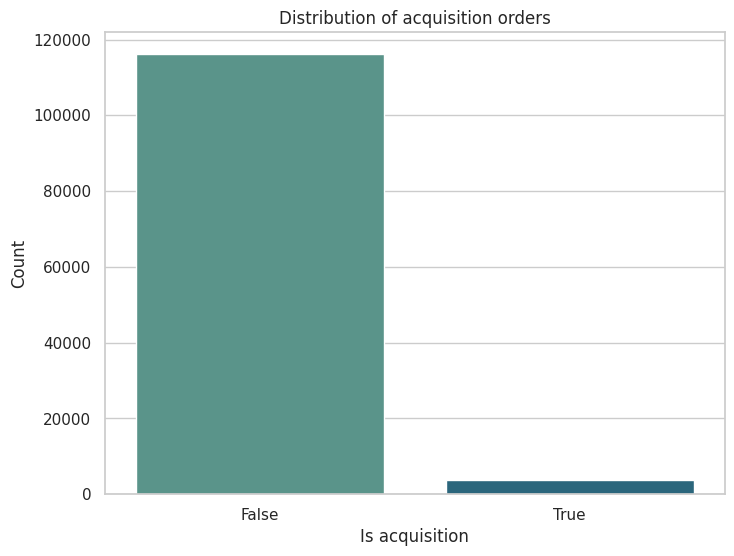

In [32]:
counts = df['is_acquisition'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Is acquisition')
plt.ylabel('Count')
plt.title('Distribution of acquisition orders')
plt.show()

<ipython-input-33-0534b23e154f>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




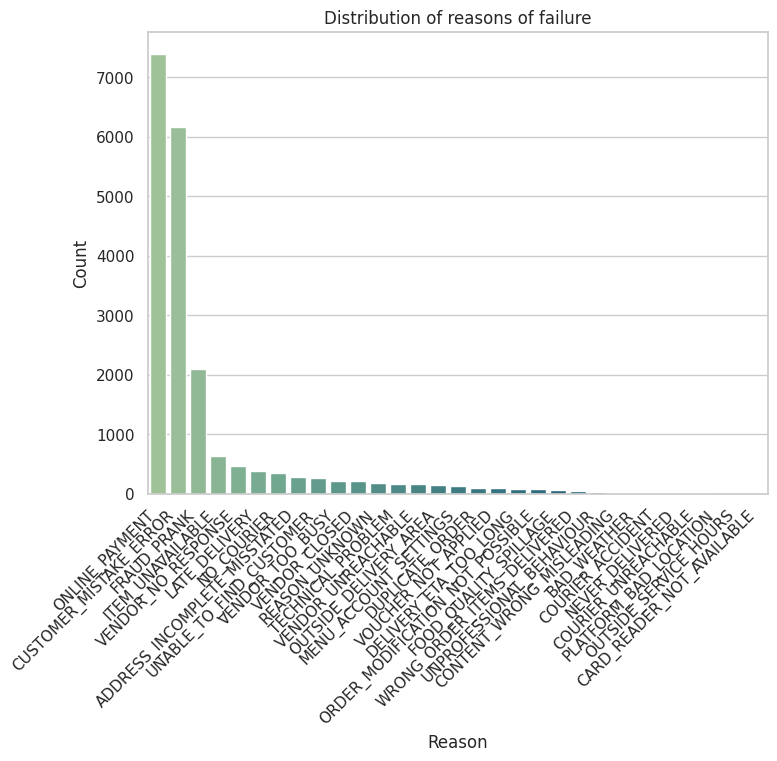

In [33]:
counts = df['reason'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of reasons of failure')
plt.show()

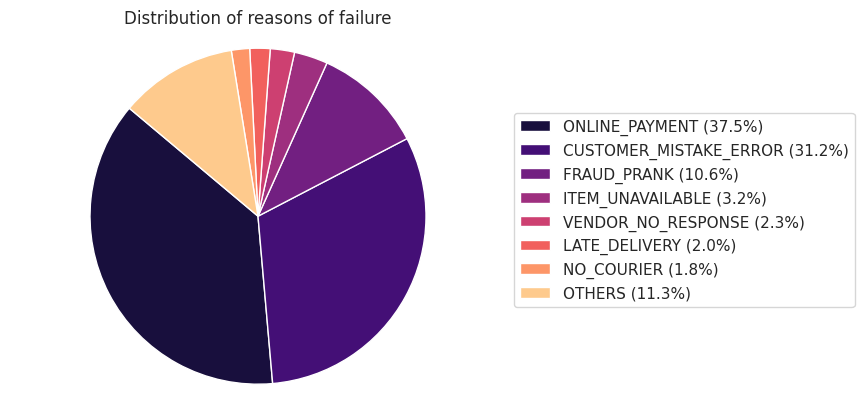

In [10]:
counts = df['reason'].value_counts()
filtered_counts = counts[counts / counts.sum() >= 0.015]
other_count = counts[counts / counts.sum() < 0.015].sum()
filtered_counts['OTHERS'] = other_count
custom_palette = sns.color_palette("magma", len(filtered_counts))

labels = ['{0} ({1:1.1f}%)'.format(i, j) for i, j in zip(filtered_counts.index, filtered_counts.values/filtered_counts.values.sum()*100)]

plt.pie(filtered_counts.values, labels=None, colors=custom_palette, startangle=140)
plt.axis('equal')

plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.8))
plt.title('Distribution of reasons of failure', loc='center')
plt.show()

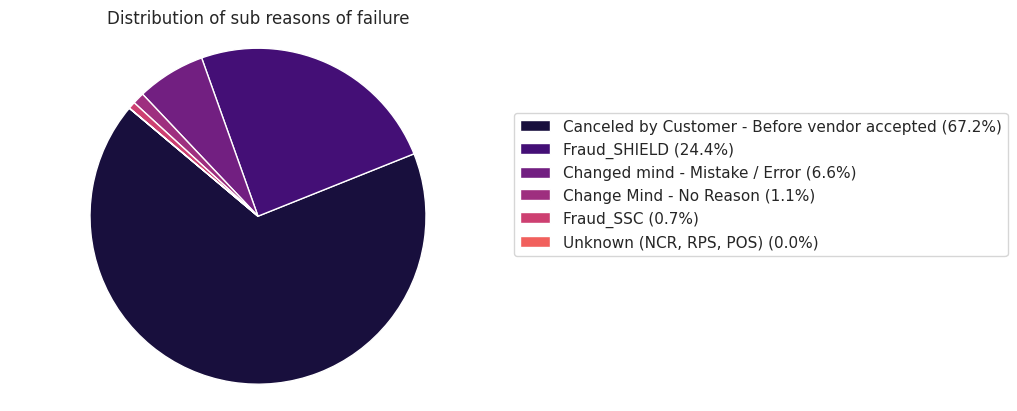

In [11]:
counts = df['sub_reason'].value_counts()
custom_palette = sns.color_palette("magma", len(filtered_counts))

labels = ['{0} ({1:1.1f}%)'.format(i, j) for i, j in zip(counts.index, counts.values/counts.values.sum()*100)]

plt.pie(counts.values, labels=None, colors=custom_palette, startangle=140)
plt.axis('equal')

plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.8))
plt.title('Distribution of sub reasons of failure', loc='center')
plt.show()

<ipython-input-12-d1489263f32c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


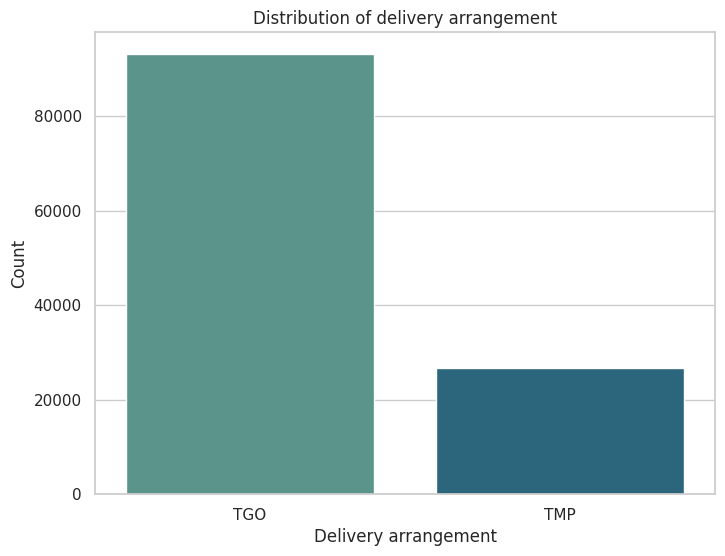

In [12]:
counts = df['delivery_arrangement'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Delivery arrangement')
plt.ylabel('Count')
plt.title('Distribution of delivery arrangement')
plt.show()

<ipython-input-13-5a0de3f98b2f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


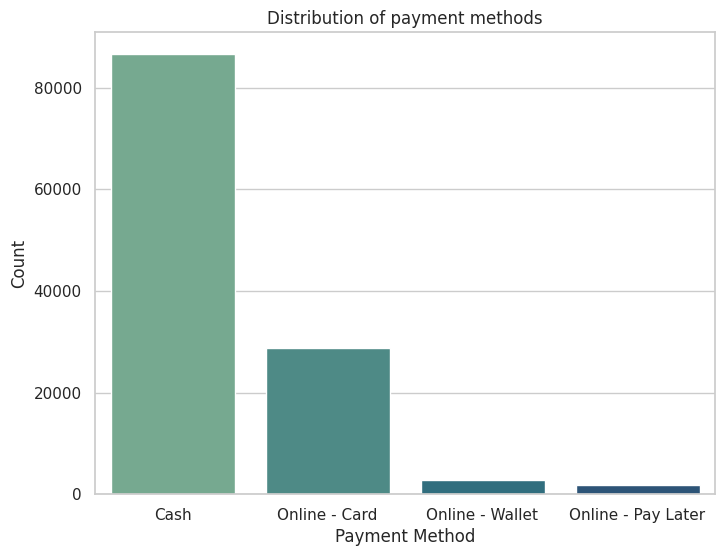

In [13]:
counts = df['Payment Method'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of payment methods')
plt.show()

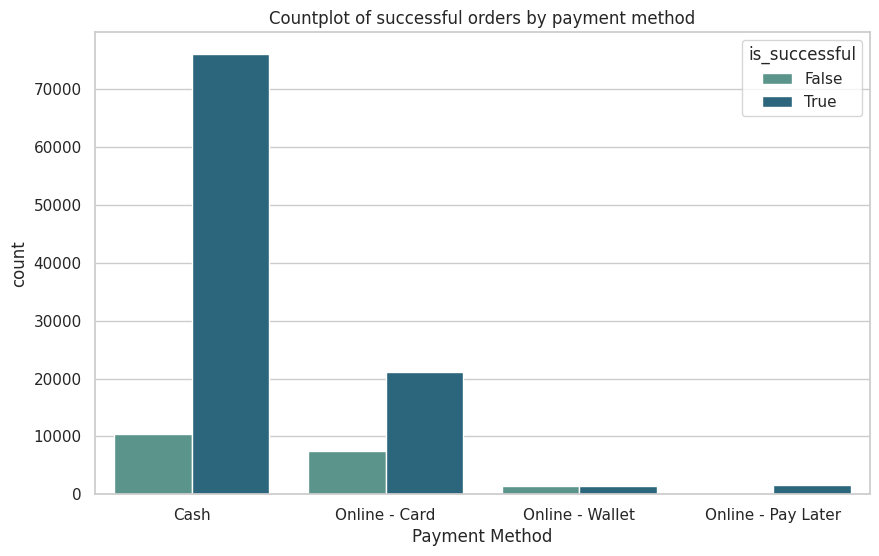

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Payment Method", hue="is_successful", data=df, palette = 'crest')
plt.title('Countplot of successful orders by payment method')
plt.show()

<ipython-input-15-f8b6103f8e5d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


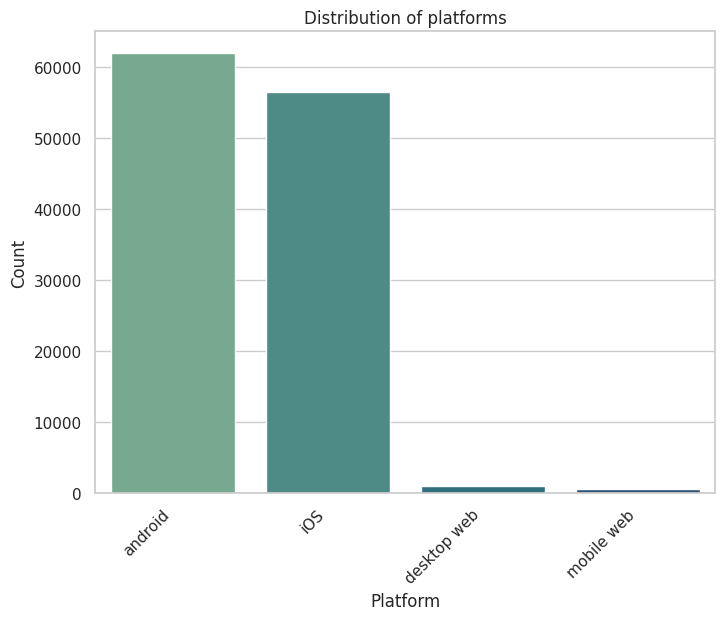

In [15]:
counts = df['platform'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of platforms')
plt.show()

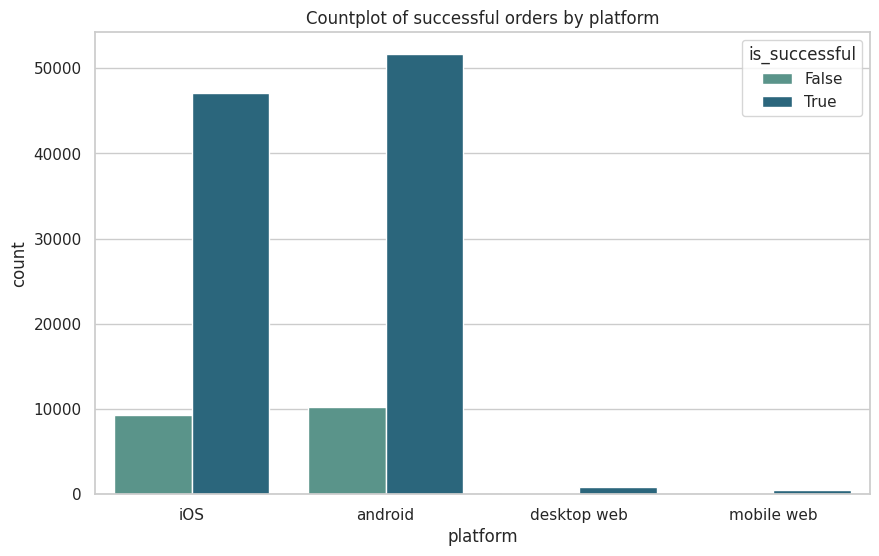

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="platform", hue="is_successful", data=df, palette = 'crest')
plt.title('Countplot of successful orders by platform')
plt.show()

<ipython-input-17-ea830571a6bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


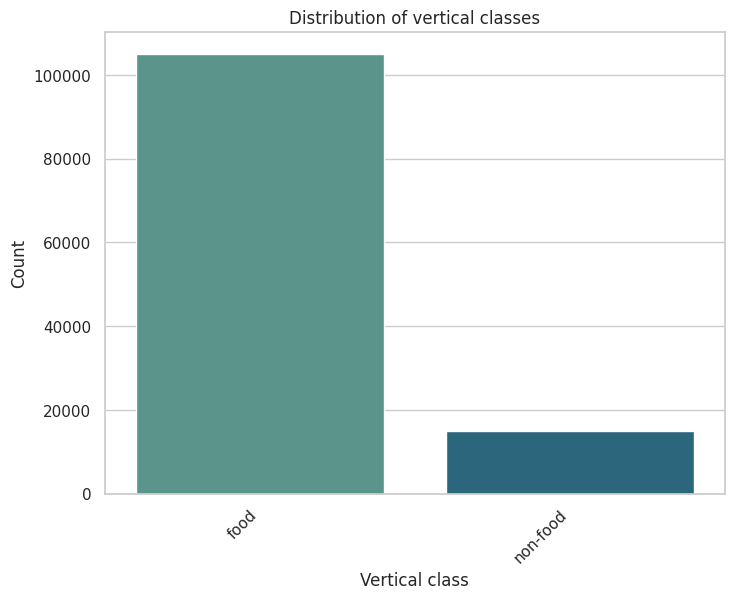

In [17]:
counts = df['vertical_class'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Vertical class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of vertical classes')
plt.show()

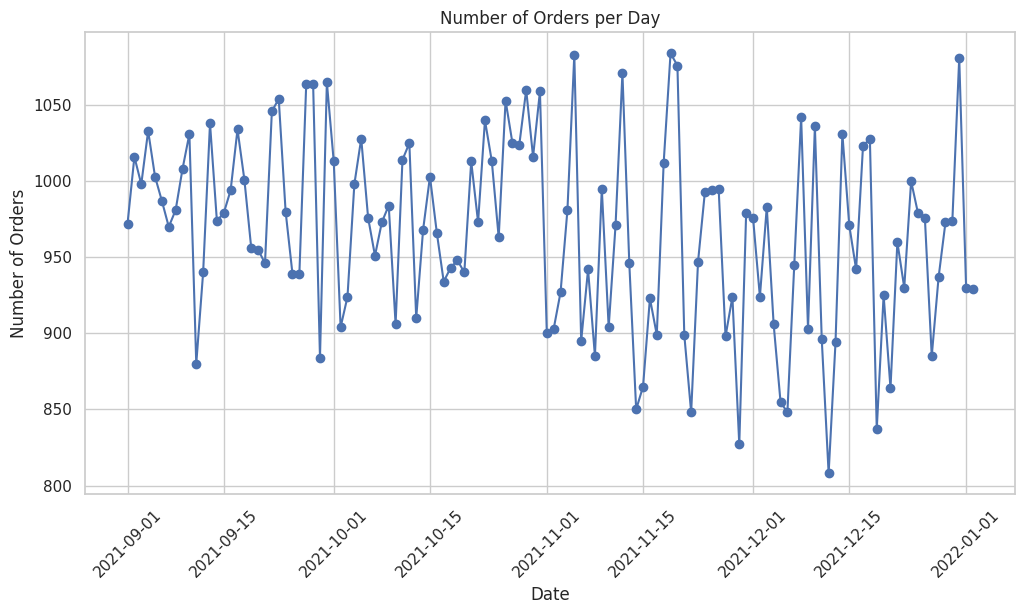

In [18]:
df['order_time'] = pd.to_datetime(df['order_time'])
df['order_day'] = df['order_time'].dt.date
num_orders_per_day = df.groupby('order_day')['order_id'].count()
plt.figure(figsize=(12, 6))
plt.plot(num_orders_per_day.index, num_orders_per_day.values, marker='o', color='b', label='Number of Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

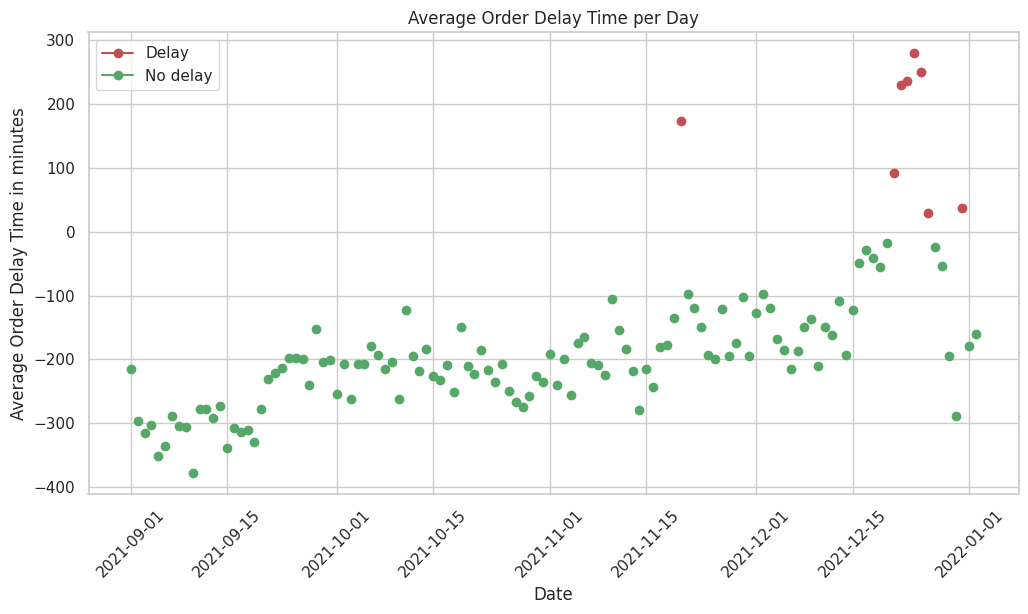

In [19]:
plt.figure(figsize=(12, 6))
avg_delay_per_day = df.groupby('order_day')['order_delay'].mean()
for day, value in avg_delay_per_day.items():
    color = 'r' if value > 0 else 'g'
    plt.plot(day, value, marker='o', color=color)
plt.xlabel('Date')
plt.ylabel('Average Order Delay Time in minutes')
plt.title('Average Order Delay Time per Day')
plt.xticks(rotation=45)
plt.plot([], marker='o', color='r', label='Delay')
plt.plot([], marker='o', color='g', label='No delay')
plt.legend()
plt.grid(True)
plt.show()

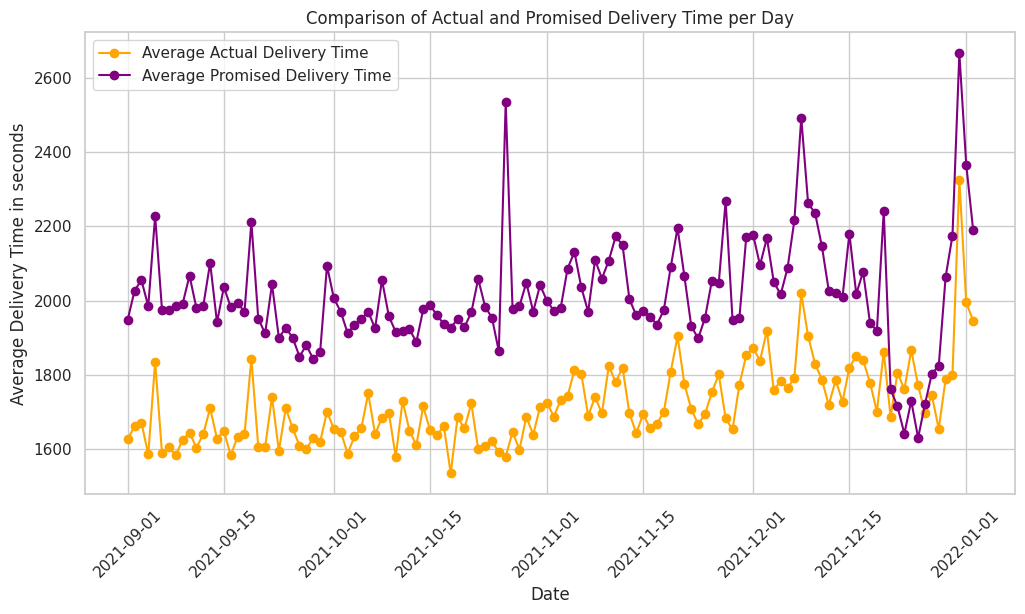

In [20]:
avg_actual_delivery_time_per_day = df.groupby('order_day')['actual_delivery_time'].mean()

# Calculate the average promised delivery time per day
avg_promised_delivery_time_per_day = df.groupby('order_day')['promised_delivery_time'].mean()

# Create a line graph comparing the two features per day
plt.figure(figsize=(12, 6))
plt.plot(avg_actual_delivery_time_per_day.index, avg_actual_delivery_time_per_day.values, marker='o', color='orange', label='Average Actual Delivery Time')
plt.plot(avg_promised_delivery_time_per_day.index, avg_promised_delivery_time_per_day.values, marker='o', color='purple', label='Average Promised Delivery Time')
plt.xlabel('Date')
plt.ylabel('Average Delivery Time in seconds')
plt.title('Comparison of Actual and Promised Delivery Time per Day')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-21-c4bf52b4f1ed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


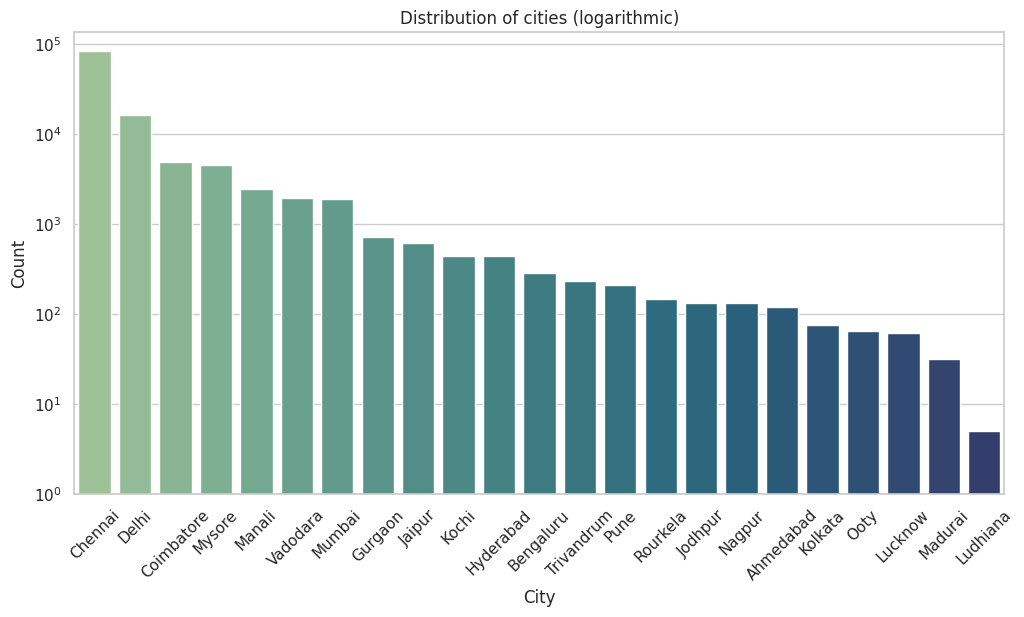

In [21]:
counts = df['City'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of cities (logarithmic)')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.ylim(1, None)  # Set the minimum y-axis limit to 1
plt.xticks(rotation=45)
plt.show()

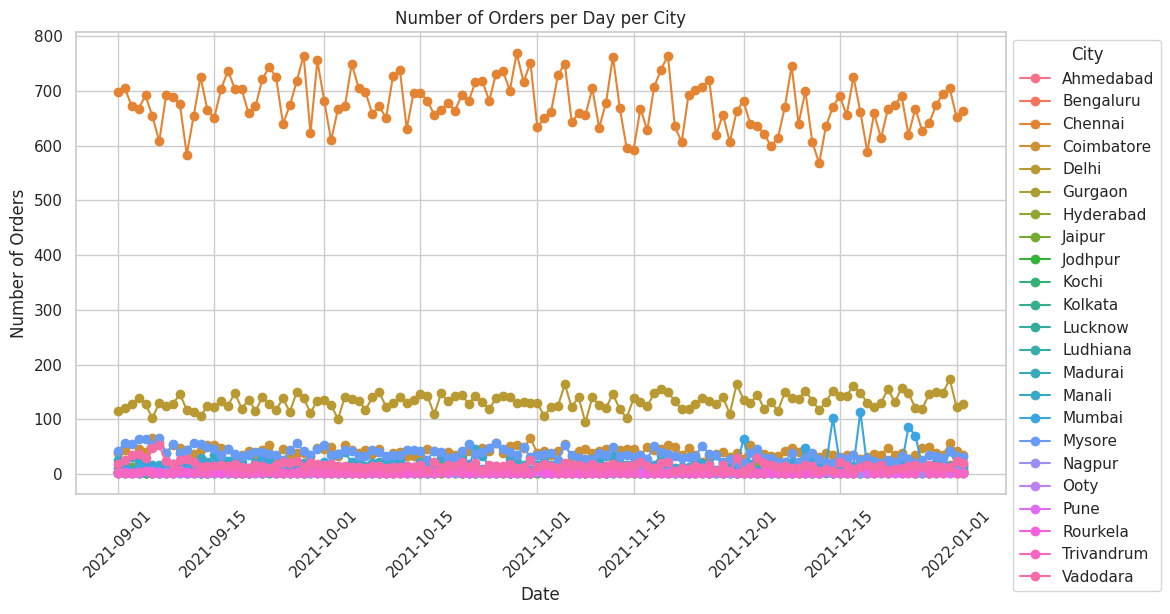

In [22]:
orders_per_day_per_city = df.groupby(['order_day', 'City']).size().unstack()

plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', n_colors=len(orders_per_day_per_city.columns))

for i, city in enumerate(orders_per_day_per_city.columns):
    plt.plot(orders_per_day_per_city.index, orders_per_day_per_city[city], marker='o', label=city, color=colors[i])

plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day per City')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

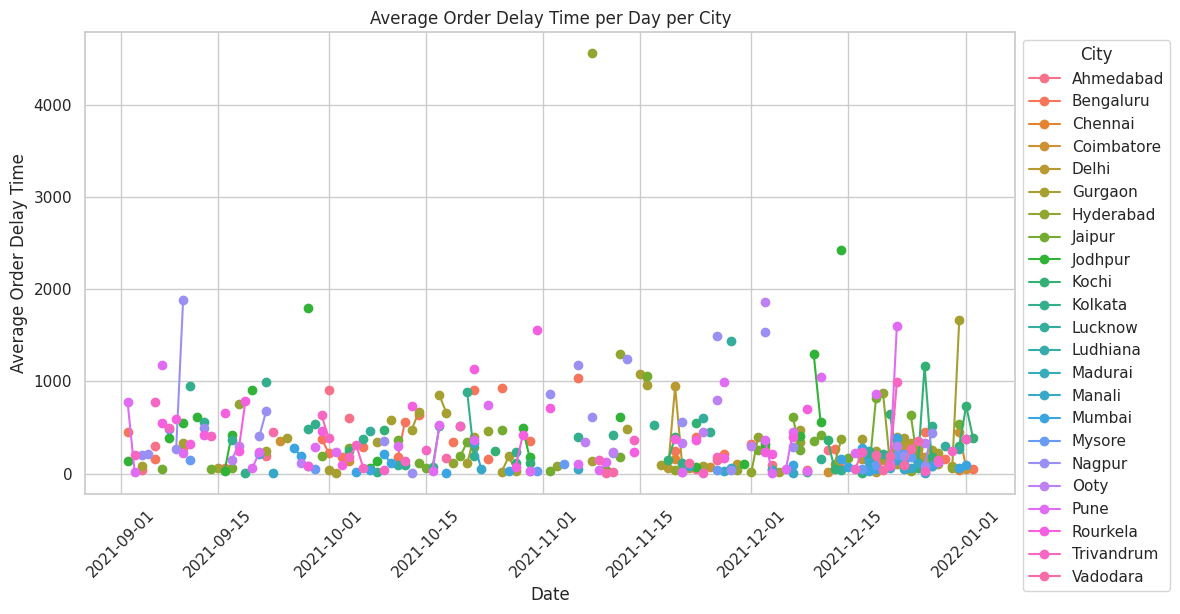

In [23]:
avg_delay_per_day_per_city = df.groupby(['order_day', 'City'])['order_delay'].mean().unstack()
avg_delay_per_day_per_city_filtered = avg_delay_per_day_per_city[avg_delay_per_day_per_city > 0]
plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', n_colors=len(avg_delay_per_day_per_city.columns))
for i, city in enumerate(avg_delay_per_day_per_city_filtered.columns):
    plt.plot(avg_delay_per_day_per_city_filtered.index, avg_delay_per_day_per_city_filtered[city], marker='o', label=city, color=colors[i])

plt.xlabel('Date')
plt.ylabel('Average Order Delay Time')
plt.title('Average Order Delay Time per Day per City')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

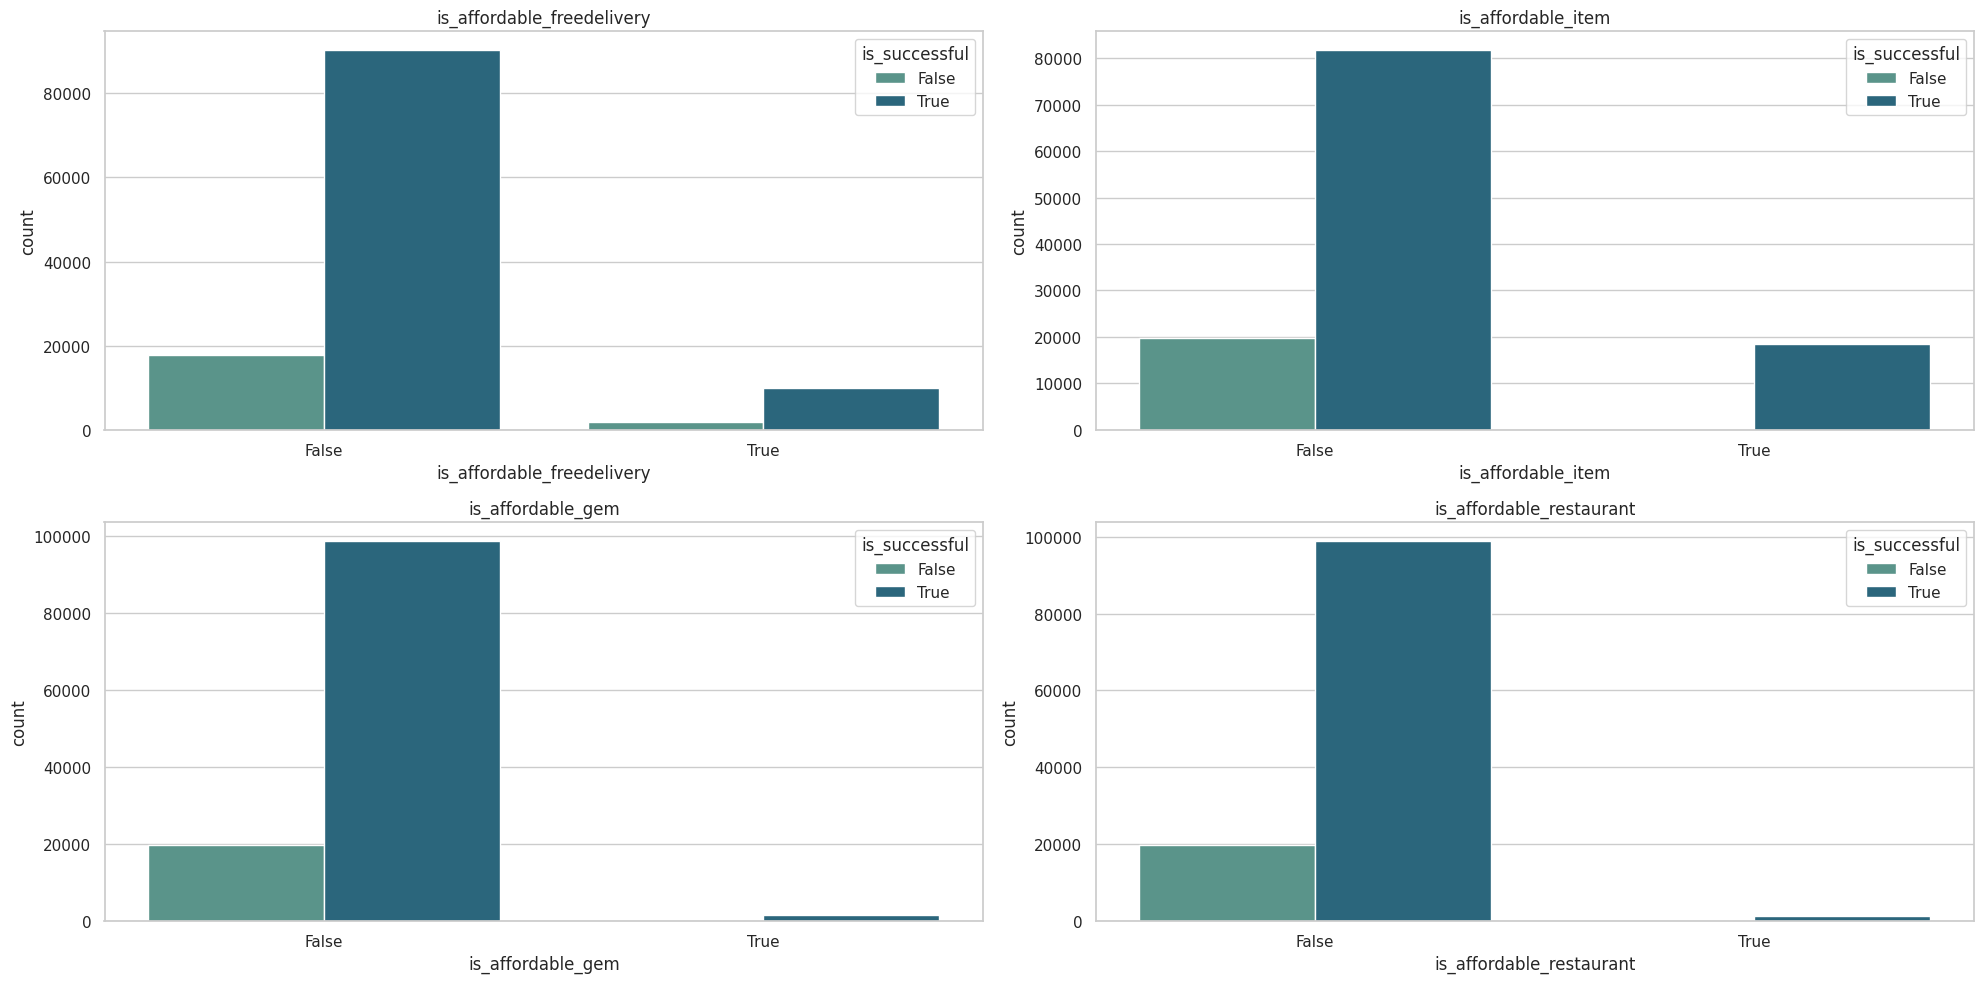

In [24]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

plt.subplot(221)
sns.countplot(x="is_affordable_freedelivery", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_freedelivery')

plt.subplot(222)
sns.countplot(x="is_affordable_item", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_item')

plt.subplot(223)
sns.countplot(x="is_affordable_gem", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_gem')

plt.subplot(224)
sns.countplot(x="is_affordable_restaurant", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_restaurant')

plt.tight_layout()
plt.show()

In [25]:
import plotly.express as px

In [26]:
city_coordinates = {
    'Ahmedabad': {'lat': 23.0225, 'lon': 72.5714},
    'Bengaluru': {'lat': 12.9716, 'lon': 77.5946},
    'Chennai': {'lat': 13.0827, 'lon': 80.2707},
    'Coimbatore': {'lat': 11.0168, 'lon': 76.9558},
    'Delhi': {'lat': 28.6139, 'lon': 77.209},
    'Gurgaon': {'lat': 28.4595, 'lon': 77.0266},
    'Hyderabad': {'lat': 17.385, 'lon': 78.4867},
    'Jaipur': {'lat': 26.9124, 'lon': 75.7873},
    'Jodhpur': {'lat': 26.2389, 'lon': 73.0243},
    'Kochi': {'lat': 9.9312, 'lon': 76.2673},
    'Kolkata': {'lat': 22.5726, 'lon': 88.3639},
    'Lucknow': {'lat': 26.8467, 'lon': 80.9462},
    'Ludhiana': {'lat': 30.901, 'lon': 75.8573},
    'Madurai': {'lat': 9.9252, 'lon': 78.1198},
    'Manali': {'lat': 32.2396, 'lon': 77.1887},
    'Mumbai': {'lat': 19.076, 'lon': 72.8777},
    'Mysore': {'lat': 12.2958, 'lon': 76.6394},
    'Nagpur': {'lat': 21.1458, 'lon': 79.0882},
    'Ooty': {'lat': 11.4067, 'lon': 76.6932},
    'Pune': {'lat': 18.5204, 'lon': 73.8567},
    'Rourkela': {'lat': 22.2587, 'lon': 84.9011},
    'Trivandrum': {'lat': 8.5241, 'lon': 76.9366},
    'Vadodara': {'lat': 22.3072, 'lon': 73.1812}
}

# Calculate the number of orders per city
orders_per_city = df.groupby('City')['order_id'].count().reset_index()
orders_per_city.columns = ['City', 'Number_of_Orders']

# Add latitude and longitude coordinates to the DataFrame
orders_per_city['lat'] = orders_per_city['City'].apply(lambda x: city_coordinates[x]['lat'])
orders_per_city['lon'] = orders_per_city['City'].apply(lambda x: city_coordinates[x]['lon'])

# Create a scatter map for the number of orders per city in India using Plotly Express
fig = px.scatter_mapbox(orders_per_city, lat="lat", lon="lon", hover_name="City", hover_data=["Number_of_Orders"],
                        size="Number_of_Orders", color="Number_of_Orders", size_max=50,
                        mapbox_style="carto-positron", zoom=4, title='Number of Orders per City in India')
fig.show()

<ipython-input-35-2dfcd5a7ce57>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-35-2dfcd5a7ce57>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-35-2dfcd5a7ce57>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




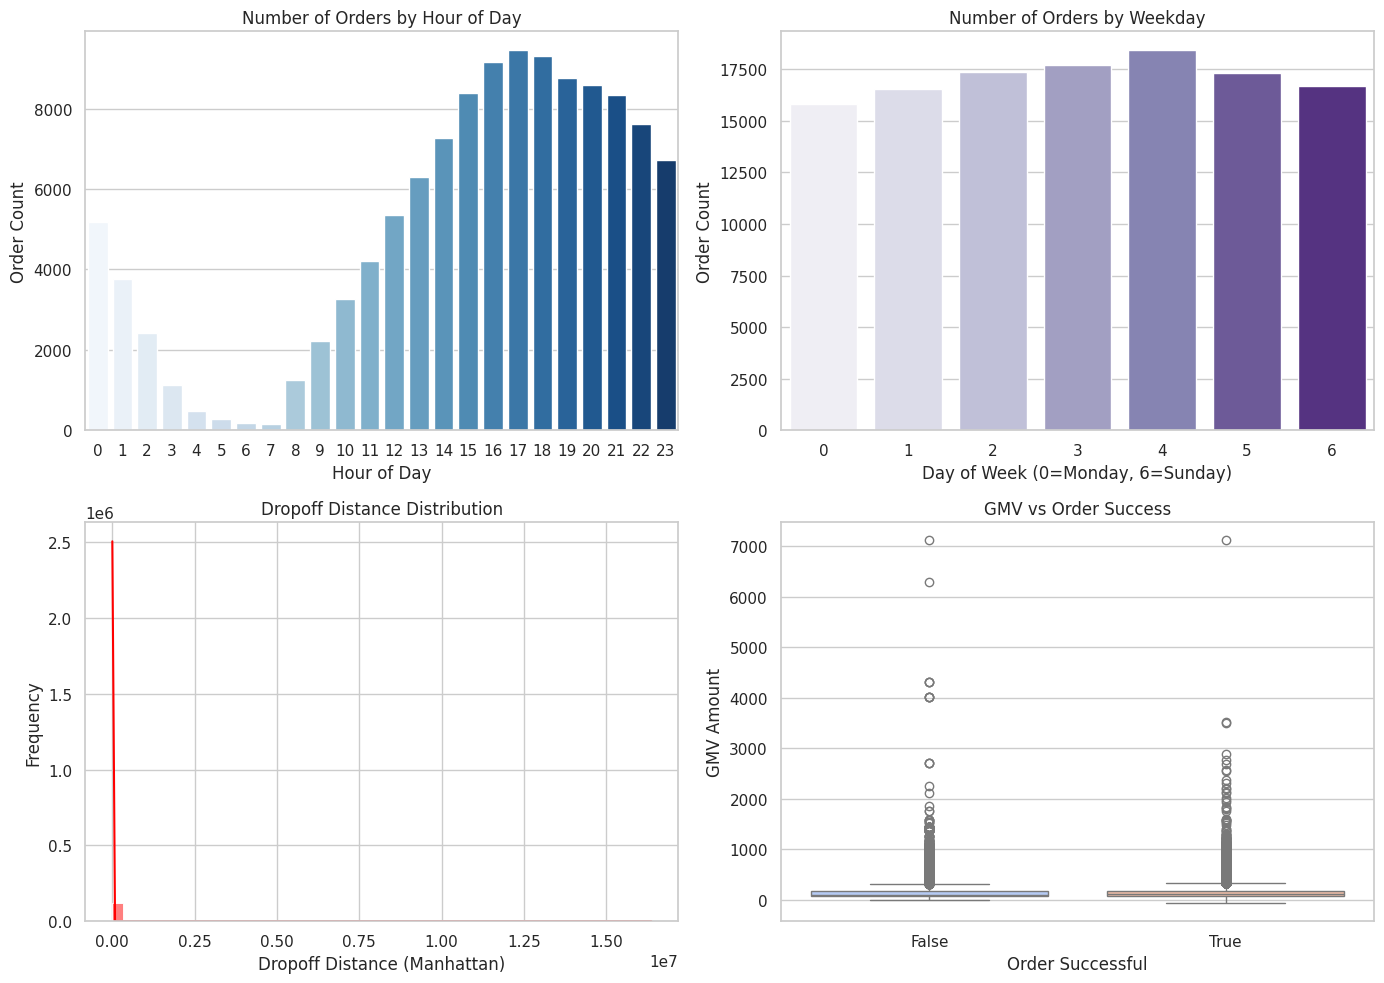

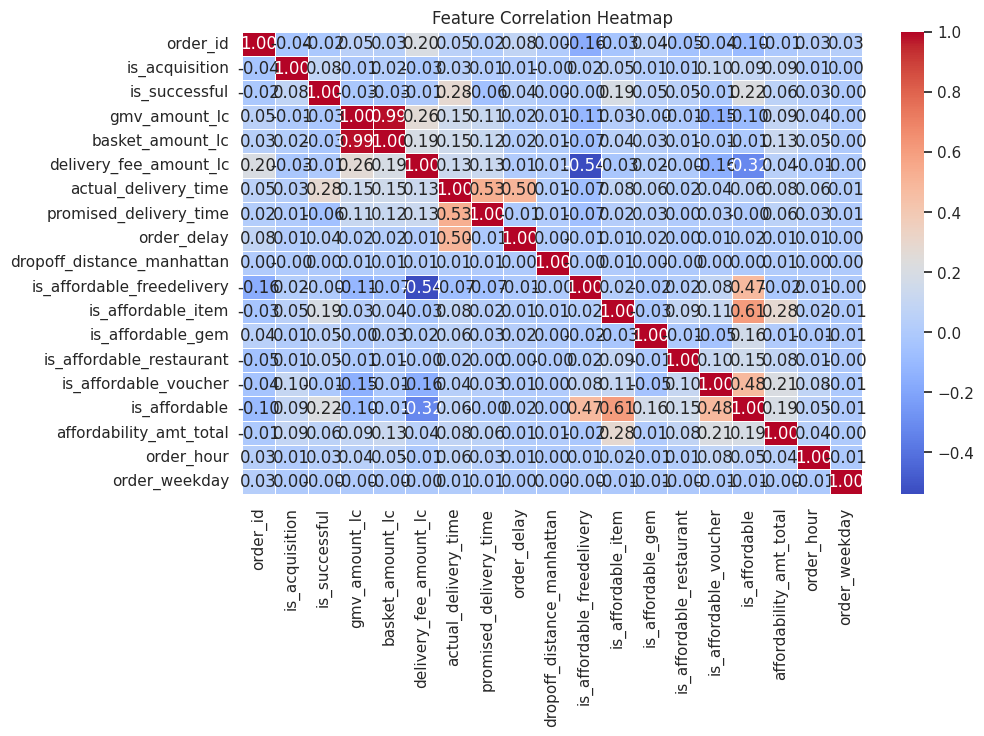

<ipython-input-35-2dfcd5a7ce57>:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




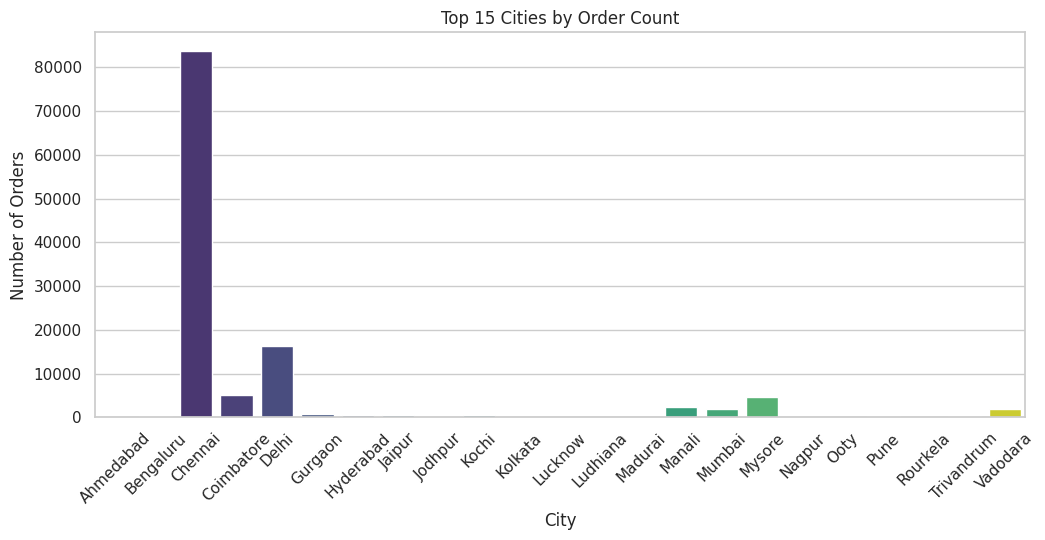

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Orders by hour
sns.countplot(x=df["order_hour"], palette="Blues", ax=axes[0, 0])
axes[0, 0].set_title("Number of Orders by Hour of Day")
axes[0, 0].set_xlabel("Hour of Day")
axes[0, 0].set_ylabel("Order Count")

# Orders by weekday
sns.countplot(x=df["order_weekday"], palette="Purples", ax=axes[0, 1])
axes[0, 1].set_title("Number of Orders by Weekday")
axes[0, 1].set_xlabel("Day of Week (0=Monday, 6=Sunday)")
axes[0, 1].set_ylabel("Order Count")

# Distance distribution
sns.histplot(df["dropoff_distance_manhattan"], bins=50, kde=True, color="red", ax=axes[1, 0])
axes[1, 0].set_title("Dropoff Distance Distribution")
axes[1, 0].set_xlabel("Dropoff Distance (Manhattan)")
axes[1, 0].set_ylabel("Frequency")

# GMV vs. Success rate
sns.boxplot(x=df["is_successful"], y=df["gmv_amount_lc"], palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("GMV vs Order Success")
axes[1, 1].set_xlabel("Order Successful")
axes[1, 1].set_ylabel("GMV Amount")

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Orders by city
plt.figure(figsize=(12, 5))
top_cities = df["City"].value_counts().nlargest(15)
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 15 Cities by Order Count")
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.show()


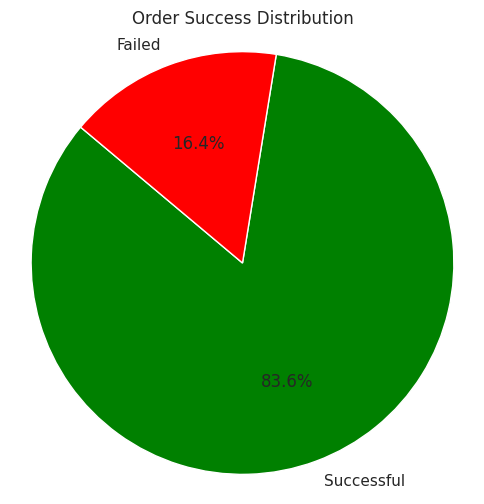

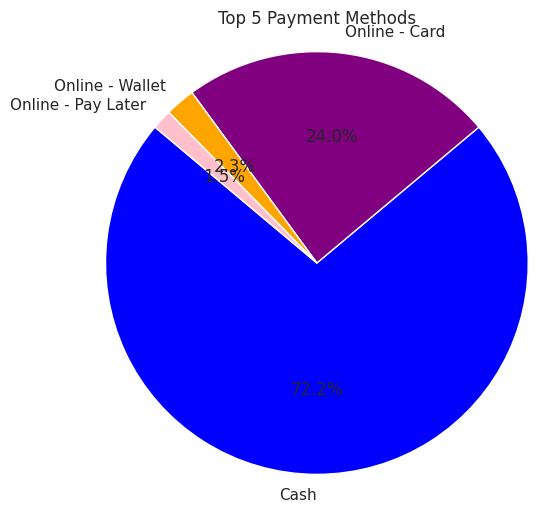

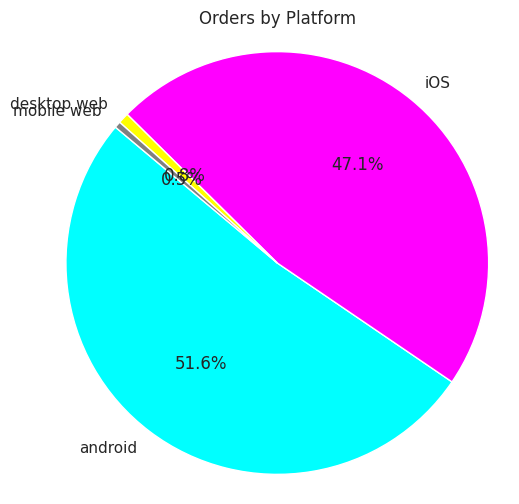

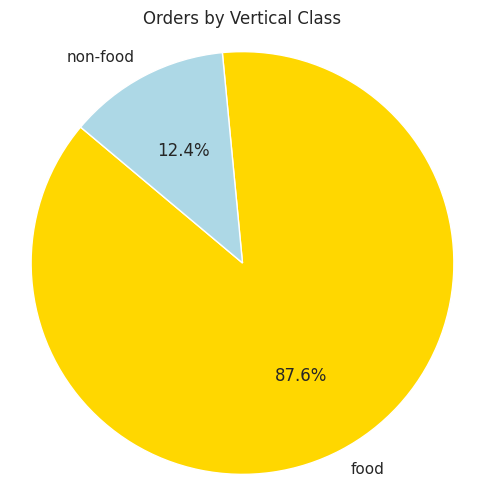

In [36]:
# Function to create pie charts
def plot_pie(data, labels, title, colors=None):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# 1. Success vs Failure Orders
success_counts = df["is_successful"].value_counts()
plot_pie(success_counts, labels=["Successful", "Failed"], title="Order Success Distribution", colors=["green", "red"])

# 2. Payment Method Distribution
payment_counts = df["Payment Method"].value_counts().nlargest(5)  # Top 5 payment methods
plot_pie(payment_counts, labels=payment_counts.index, title="Top 5 Payment Methods", colors=["blue", "purple", "orange", "pink", "gray"])

# 3. Platform Distribution
platform_counts = df["platform"].value_counts()
plot_pie(platform_counts, labels=platform_counts.index, title="Orders by Platform", colors=["cyan", "magenta", "yellow", "gray"])

# 4. Vertical Class Distribution
vertical_counts = df["vertical_class"].value_counts()
plot_pie(vertical_counts, labels=vertical_counts.index, title="Orders by Vertical Class", colors=["gold", "lightblue", "lightgreen", "salmon"])